# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/425441/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

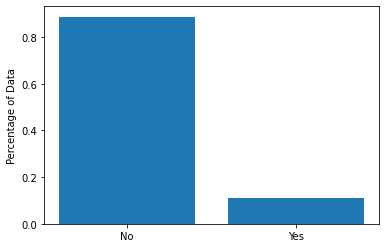

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# resample data based on the visualization above
oversample = SMOTE()
X_scaled,y_train = oversample.fit_resample(X_scaled,y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.499\ngini = 0.293\nsamples = 19917\nvalue = [16367, 3550]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.104\nsamples = 10345\nvalue = [9777, 568]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.089\nsamples = 10165\nvalue = [9688, 477]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 180\nvalue = [89, 91]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.429\nsamples = 9572\nvalue = [6590, 2982]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 6935\nvalue = [4054, 2881]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.074\nsamples = 2637\nvalue = [2536, 101]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.416\nsamples = 31243\nvalue = [9213, 22030]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.712\ngini = 0.336\nsamples = 25684\nvalue = [5490, 20194]\nclass = 

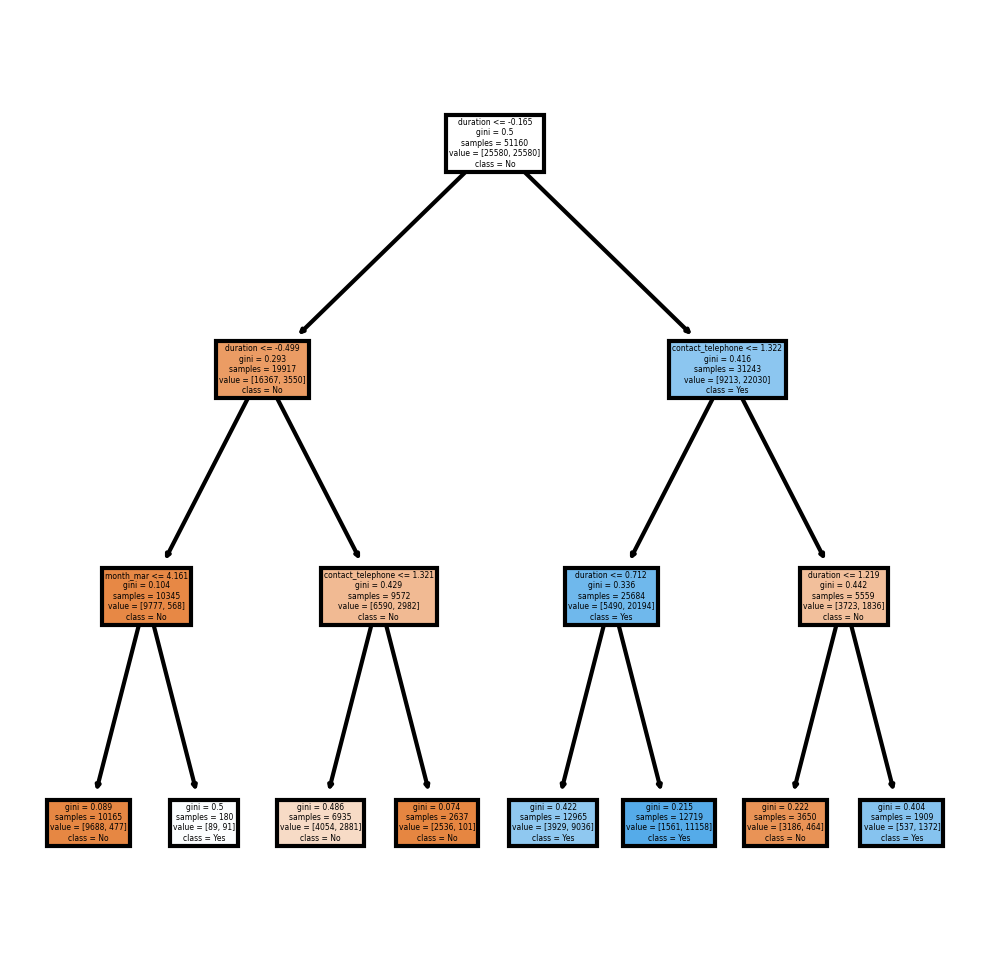

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

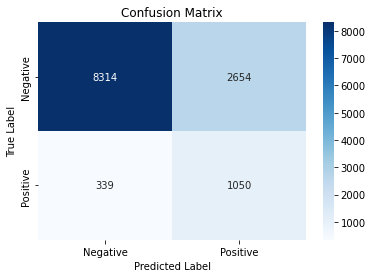

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [16]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7535809662539451


In [17]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

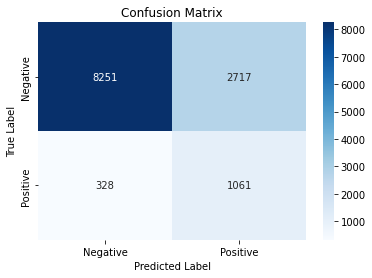

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [21]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

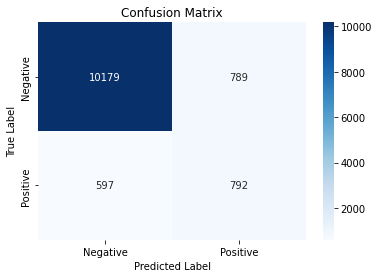

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [23]:
!pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 16.4 MB/s eta 0:00:00


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression


####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

In [42]:
### SET YOUR BASE LEARNERS
base_estimators = [
          LogisticRegression(),
          RandomForestClassifier(),
          KNeighborsClassifier(n_neighbors=3),
          AdaBoostClassifier(),
          LinearRegression()]

super_learner = SuperLearner()
super_learner.add(base_estimators)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled,y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)
base_predictions

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

array([[ 0.        ,  0.        ,  0.641993  ,  1.        ,  0.        ],
       [ 0.        ,  0.        , -0.02943018,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.05613118,  0.        ,  0.        ],
       ...,
       [ 1.        ,  1.        ,  0.9321278 ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.73556006,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  0.4571539 ,  1.        ,  1.        ]],
      dtype=float32)

In [26]:
### TRAIN YOUR METALEARNER

In [43]:
log_reg = LogisticRegression(fit_intercept=False).fit(base_predictions,y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
### INTERPRET COEFFICIENTS

In [56]:
log_reg.coef_
# base_estimators = [LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=3),AdaBoostClassifier(),LinearRegression()]

array([[  1.03211064,  -1.19660494, -12.39966651,   1.68634072,
         28.38443451]])

The coefficient shows that LinearRegression is the most effective method when predicting in this dataset with the largest coefficient, and KNN has the worst effect with the minimum value. And LogisticRegression and Boost have less positive effect, while RandomForest has less negative effect.

In [45]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_true = y_test
cm_super = confusion_matrix(y_true, y_pred)

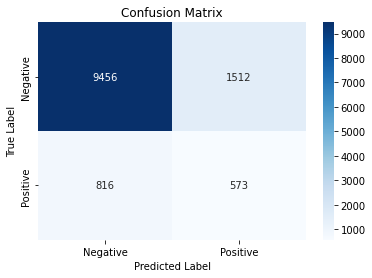

In [46]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specificity(Out of Sample)

In [47]:
from sklearn.metrics import recall_score

In [53]:
sensitivity_raw = cm_raw[1,1]/(cm_raw[1,0]+cm_raw[1,1])
sensitivity_bag = cm_bag[1,1]/(cm_bag[1,0]+cm_bag[1,1])
sensitivity_boost = cm_boost[1,1]/(cm_boost[1,0]+cm_boost[1,1])
sensitivity_super = cm_super[1,1]/(cm_super[1,0]+cm_super[1,1])

In [52]:
specificity_raw = cm_raw[0,0]/(cm_raw[0,1]+cm_raw[0,0])
specificity_bag = cm_bag[0,0]/(cm_bag[0,1]+cm_bag[0,0])
specificity_boost = cm_boost[0,0]/(cm_boost[0,1]+cm_boost[0,0])
specificity_super = cm_super[0,0]/(cm_super[0,1]+cm_super[0,0])

In [54]:
models = ['Decision Tree', 'Bagged Trees', 'Boosted Trees', 'Super Learner']
sensitivities = [sensitivity_raw, sensitivity_bag, sensitivity_boost, sensitivity_super]
specificities = [specificity_raw, specificity_bag, specificity_boost, specificity_super]

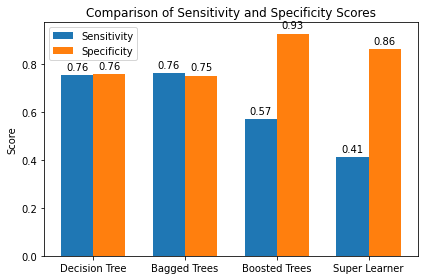

In [55]:
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sensitivities, width, label='Sensitivity')
rects2 = ax.bar(x + width/2, specificities, width, label='Specificity')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Sensitivity and Specificity Scores')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add values on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()